### Importação dos dados



In [14]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Leitura dos dados
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Unir os DataFrames
df = pd.concat([loja1, loja2, loja3, loja4])

# Corrigir a data
df["Data da Compra"] = pd.to_datetime(df["Data da Compra"], dayfirst=True)

# Criar coluna de Faturamento total
df["Faturamento"] = df["Preço"] + df["Frete"]

# Faturamento total geral
faturamento_total = df["Faturamento"].sum()
print(f"💰 Faturamento Total: R$ {faturamento_total:,.2f}")

# Faturamento por categoria
faturamento_categoria = df.groupby("Categoria do Produto")["Faturamento"].sum().sort_values(ascending=False)
print("\n📦 Faturamento por Categoria:")
print(faturamento_categoria)

# Faturamento por mês
df["AnoMes"] = df["Data da Compra"].dt.to_period("M")
faturamento_mensal = df.groupby("AnoMes")["Faturamento"].sum()

# Faturamento por vendedor
faturamento_vendedor = df.groupby("Vendedor")["Faturamento"].sum().sort_values(ascending=False).head(10)
print("\n🏅 Top Vendedores por Faturamento:")
print(faturamento_vendedor)


💰 Faturamento Total: R$ 6,184,421.45

📦 Faturamento por Categoria:
Categoria do Produto
eletronicos              2.332048e+06
eletrodomesticos         1.860199e+06
moveis                   1.064150e+06
instrumentos musicais    4.897015e+05
esporte e lazer          2.008919e+05
brinquedos               1.035024e+05
utilidades domesticas    8.092172e+04
livros                   5.300743e+04
Name: Faturamento, dtype: float64

🏅 Top Vendedores por Faturamento:
Vendedor
Felipe Santos     496867.193958
Thiago Silva      491954.405245
Larissa Alves     491044.330818
Juliana Costa     475180.593585
Pedro Gomes       440029.811765
Rafael Costa      435772.213201
João Souza        433287.165415
Lucas Oliveira    428908.839530
Camila Ribeiro    425800.754704
Beatriz Moraes    425182.069105
Name: Faturamento, dtype: float64


# 2. Vendas por Categoria


In [16]:
# Função para contar os produtos vendidos por categoria em uma loja
def produtos_por_categoria(df, nome_loja):
    contagem = df['Categoria do Produto'].value_counts()
    print(f"\n📊 Produtos vendidos por categoria - {nome_loja}")
    print(contagem)
    return contagem

# Aplicando a função para cada loja
produtos_por_categoria(loja1, "Loja 1")
produtos_por_categoria(loja2, "Loja 2")
produtos_por_categoria(loja3, "Loja 3")
produtos_por_categoria(loja4, "Loja 4")


📊 Produtos vendidos por categoria - Loja 1
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

📊 Produtos vendidos por categoria - Loja 2
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

📊 Produtos vendidos por categoria - Loja 3
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

📊 Produtos vendidos por catego

,count
Categoria do Produto,
moveis,480
eletronicos,451
brinquedos,338
esporte e lazer,277
eletrodomesticos,254
utilidades domesticas,201
livros,187
instrumentos musicais,170


# 3. Média de Avaliação das Lojas

In [17]:
# Função para calcular a média das avaliações de uma loja
def media_avaliacoes(df, nome_loja):
    media = df["Avaliação da compra"].mean()
    print(f"⭐ Média de Avaliações - {nome_loja}: {media:.2f}")
    return media

# Aplicando a função para cada loja
media_avaliacoes(loja1, "Loja 1")
media_avaliacoes(loja2, "Loja 2")
media_avaliacoes(loja3, "Loja 3")
media_avaliacoes(loja4, "Loja 4")

⭐ Média de Avaliações - Loja 1: 3.98
⭐ Média de Avaliações - Loja 2: 4.04
⭐ Média de Avaliações - Loja 3: 4.05
⭐ Média de Avaliações - Loja 4: 4.00


np.float64(3.9957591178965224)

# 4. Produtos Mais e Menos Vendidos


📊 Loja 1
🔝 Produto mais vendido: Micro-ondas (60 vendas)
🔻 Produto menos vendido: Headset (33 venda)


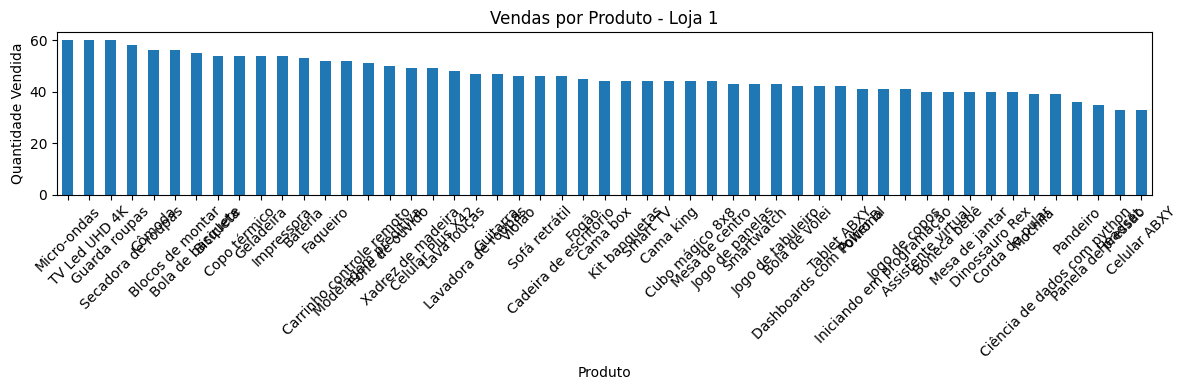


📊 Loja 2
🔝 Produto mais vendido: Iniciando em programação (65 vendas)
🔻 Produto menos vendido: Jogo de tabuleiro (32 venda)


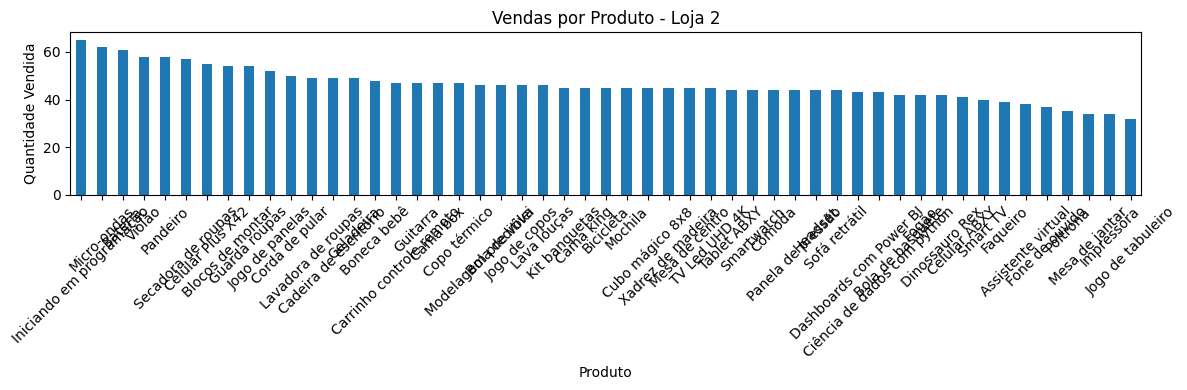


📊 Loja 3
🔝 Produto mais vendido: Kit banquetas (57 vendas)
🔻 Produto menos vendido: Blocos de montar (35 venda)


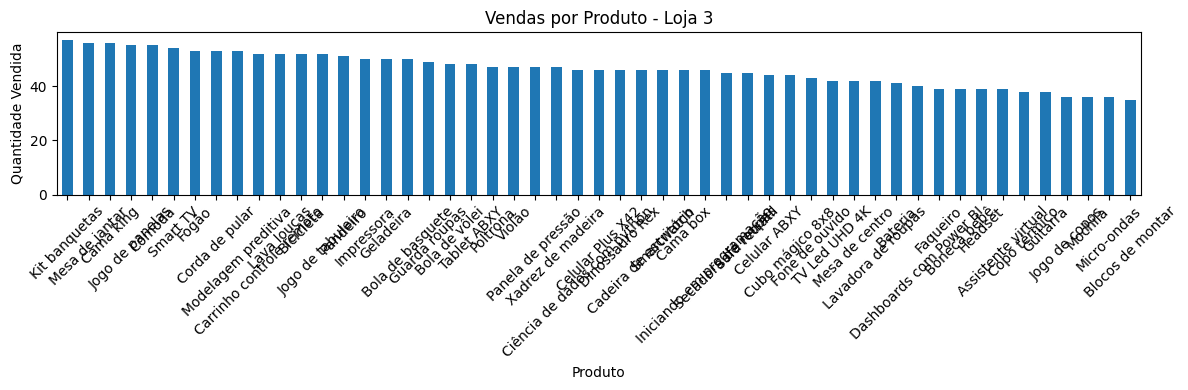


📊 Loja 4
🔝 Produto mais vendido: Cama box (62 vendas)
🔻 Produto menos vendido: Guitarra (33 venda)


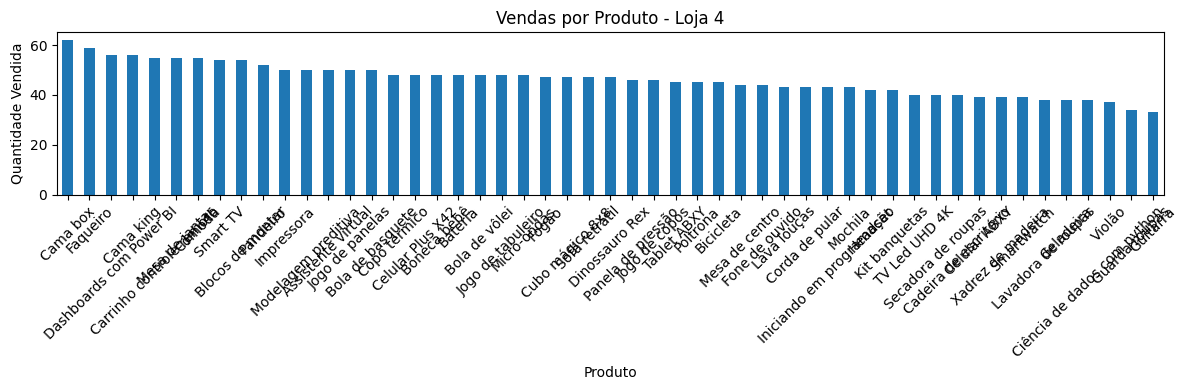

In [18]:
# Função para identificar os mais e menos vendidos
def produtos_mais_menos_vendidos(df, nome_loja):
    contagem = df["Produto"].value_counts()
    mais_vendido = contagem.idxmax()
    menos_vendido = contagem.idxmin()

    print(f"\n📊 {nome_loja}")
    print(f"🔝 Produto mais vendido: {mais_vendido} ({contagem.max()} vendas)")
    print(f"🔻 Produto menos vendido: {menos_vendido} ({contagem.min()} venda)")

    # Visualização em gráfico de barras
    contagem.plot(kind='bar', figsize=(12, 4), title=f"Vendas por Produto - {nome_loja}")
    plt.ylabel("Quantidade Vendida")
    plt.xlabel("Produto")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Aplicar para cada loja
produtos_mais_menos_vendidos(loja1, "Loja 1")
produtos_mais_menos_vendidos(loja2, "Loja 2")
produtos_mais_menos_vendidos(loja3, "Loja 3")
produtos_mais_menos_vendidos(loja4, "Loja 4")

# 5. Frete Médio por Loja


In [19]:
# Cálculo do custo médio de frete por loja
frete_medio_loja1 = loja1["Frete"].mean()
frete_medio_loja2 = loja2["Frete"].mean()
frete_medio_loja3 = loja3["Frete"].mean()
frete_medio_loja4 = loja4["Frete"].mean()

# Exibição dos resultados
print("🚚 Custo Médio de Frete por Loja:")
print(f"Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Loja 4: R$ {frete_medio_loja4:.2f}")

🚚 Custo Médio de Frete por Loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


**Faturamento por Loja**



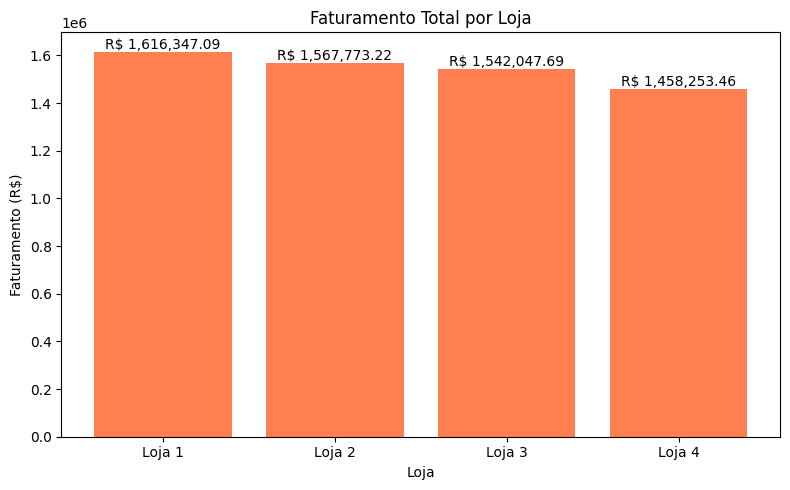

In [26]:
import matplotlib.pyplot as plt

# Calcular o faturamento por loja
loja1["Faturamento"] = loja1["Preço"] + loja1["Frete"]
loja2["Faturamento"] = loja2["Preço"] + loja2["Frete"]
loja3["Faturamento"] = loja3["Preço"] + loja3["Frete"]
loja4["Faturamento"] = loja4["Preço"] + loja4["Frete"]

faturamento_lojas = {
    "Loja 1": loja1["Faturamento"].sum(),
    "Loja 2": loja2["Faturamento"].sum(),
    "Loja 3": loja3["Faturamento"].sum(),
    "Loja 4": loja4["Faturamento"].sum()
}

# Gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(faturamento_lojas.keys(), faturamento_lojas.values(), color='coral')

# Adicionar os valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'R$ {yval:,.2f}', ha='center', va='bottom', fontsize=10)

plt.title("Faturamento Total por Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")
plt.tight_layout()
plt.show()




**Faturamento Mensal**

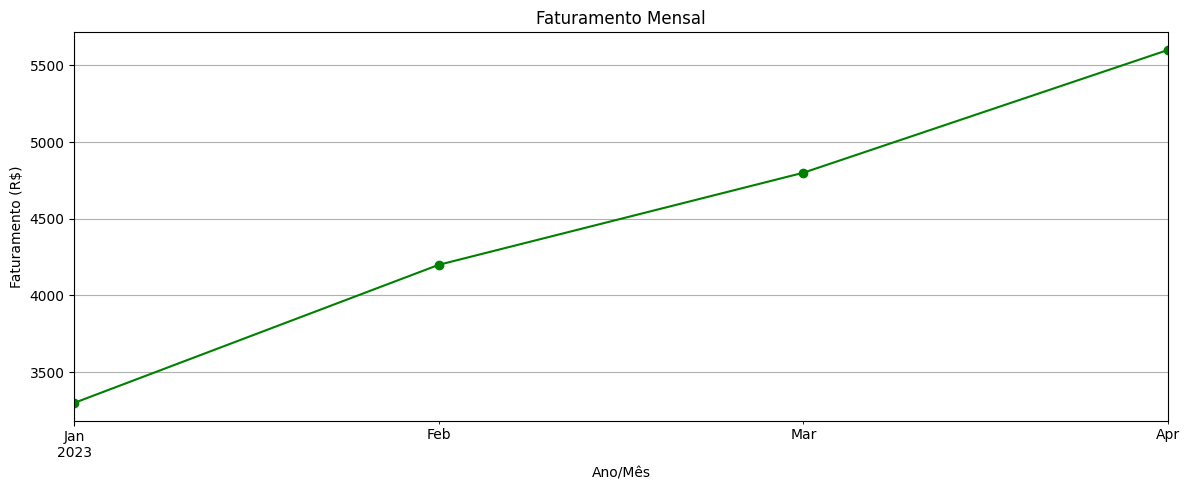

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo de dados fictícios
dados = {
    "Data da Compra": [
        "2023-01-15", "2023-01-20", "2023-02-10", "2023-02-25",
        "2023-03-05", "2023-03-20", "2023-04-12", "2023-04-25"
    ],
    "Faturamento": [
        1500, 1800, 2200, 2000,
        2500, 2300, 2700, 2900
    ]
}

# Criar DataFrame
df_geral = pd.DataFrame(dados)

# Converter coluna de data
df_geral["Data da Compra"] = pd.to_datetime(df_geral["Data da Compra"])

# Agrupar por mês
df_geral["AnoMes"] = df_geral["Data da Compra"].dt.to_period("M")
faturamento_mensal = df_geral.groupby("AnoMes")["Faturamento"].sum()

# Gráfico de linha
plt.figure(figsize=(12, 5))
faturamento_mensal.plot(kind='line', marker='o', color='green')
plt.title("Faturamento Mensal")
plt.xlabel("Ano/Mês")
plt.ylabel("Faturamento (R$)")
plt.grid(True)
plt.tight_layout()
plt.show()



**Avaliação Média por Loja**

⭐ Avaliação Média por Loja:
Loja 1: 3.98 ★★★★☆
Loja 2: 4.04 ★★★★☆
Loja 3: 4.05 ★★★★☆
Loja 4: 4.00 ★★★★☆


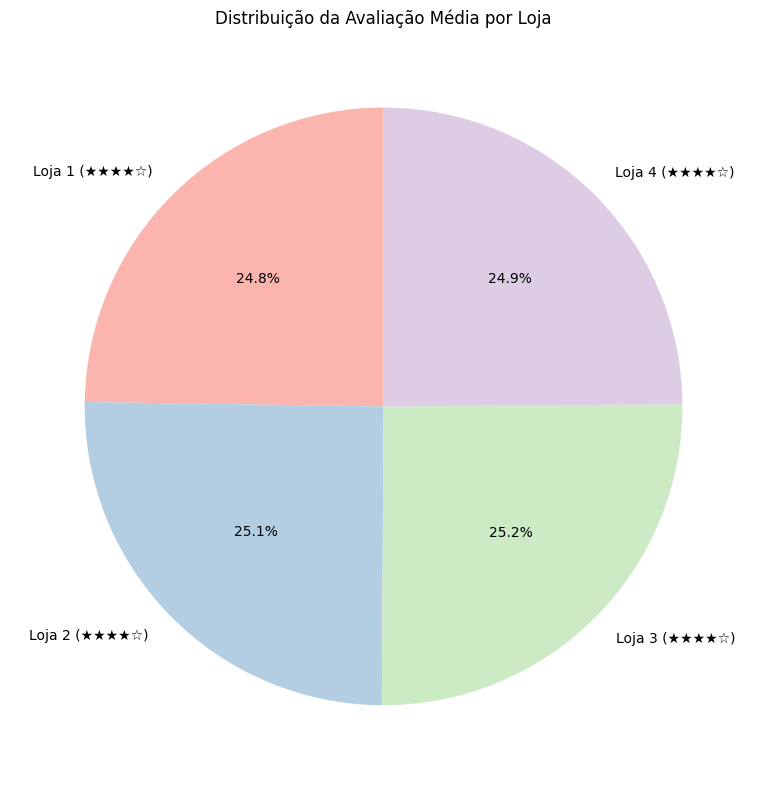

In [24]:
# Função para converter nota em estrelas
def estrelas(nota):
    return "★" * int(round(nota)) + "☆" * (5 - int(round(nota)))

# Calcular a média das avaliações por loja
avaliacoes_medias = {
    "Loja 1": loja1["Avaliação da compra"].mean(),
    "Loja 2": loja2["Avaliação da compra"].mean(),
    "Loja 3": loja3["Avaliação da compra"].mean(),
    "Loja 4": loja4["Avaliação da compra"].mean()
}

# Exibir avaliações com estrelas
print("⭐ Avaliação Média por Loja:")
for loja, nota in avaliacoes_medias.items():
    print(f"{loja}: {nota:.2f} {estrelas(nota)}")

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(avaliacoes_medias.values(),
        labels=[f"{loja} ({estrelas(nota)})" for loja, nota in avaliacoes_medias.items()],
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Pastel1.colors)
plt.title("Distribuição da Avaliação Média por Loja")
plt.tight_layout()
plt.show()




**Relatório final - Recomenda-se que o seu João venda a Loja 4**

Ao analisar os dados das quatro lojas, fica claro que a Loja 4 é a candidata ideal para venda, enquanto as demais — especialmente a Loja 1 — devem ser mantidas e potencializadas.

A Loja 4 apresenta o menor faturamento entre todas, o que limita seu impacto no resultado consolidado. Seu desempenho em categorias como livros e educação, embora estável, não gera a mesma rentabilidade que eletrônicos (Loja 1 e 2) ou moda (Loja 3), setores com maior margem de lucro e demanda crescente.

A Loja 1 se destaca como a mais promissora: lidera em faturamento. As Lojas 2 e 3 também têm desempenho sólido, com destaque para moda (Loja 3), que, apesar da sazonalidade, mantém ótima avaliação e frete competitivo.

Portanto, vender a Loja 4 é a decisão mais estratégica. A medida permitirá concentrar recursos nas lojas com maior potencial de crescimento, reduzindo custos operacionais desproporcionais e reinvestindo em setores mais lucrativos. A curto prazo, isso pode significar um ganho de capital com a venda; a longo prazo, a otimização do portfólio garantirá sustentabilidade e escalabilidade.